ㆍ삼성전기 곽소라프로의 컴플레인
- 신규 데이터를 색인을 넣고 색인이 완료 되었다고 하지만 검색이 되지 않는다
- 색인 성능이 나오지 않는 것 같다

ㆍ요구사항
- 색인 작업이 개선 되었다면 로그를 통해 수치로 확인하고싶다

## import modules

In [1]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

---

## load data to pandas dataframe

In [28]:
path_dir = './logs'
file_list = os.listdir(path_dir)
file_list.sort()
data = pd.DataFrame()
for file in file_list:
    now = pd.read_csv(f'{path_dir}/{file}', sep='\r\s', header=None, engine='python')
    data = pd.concat([data,now])
data[['date', 'time','loglevel' ,'serviceID', 'message']] = data[0].str.split(' ', n=4, expand=True)
warnings.filterwarnings(action='ignore')
data.describe()

,0,date,time,loglevel,serviceID,message
count,219,219,219,219,219,219
unique,219,4,49,2,2,138
top,04/08/2020 10:54:15 [0] 30-Normal: Index conne...,03/08/2020,15:44:46,[1],30-Normal:,Index connection granted to: 127.0.0.1
freq,1,206,14,183,216,17


In [19]:
data

,timestamp,serviceID,loglevel,message
index,,,,
0,2020-08-03 01:37:01,30-Normal:,[1],"Unstemmed flush complete. 9201 inserts, 509 up..."
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21
2,2020-08-03 01:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
3,2020-08-03 02:37:01,30-Normal:,[1],"Unstemmed flush complete. 10209 inserts, 2030 ..."
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22
...,...,...,...,...
214,2020-08-05 01:37:01,30-Normal:,[1],Done Indexing IndexID=21
215,2020-08-05 01:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
216,2020-08-06 01:37:01,30-Normal:,[1],"Unstemmed flush complete. 9201 inserts, 509 up..."


---

## assign index and datetime

In [3]:
data['datetime'] = data['date'] + data['time']
data['timestamp'] = pd.to_datetime(data['datetime'], format="%d/%m/%Y%H:%M:%S")
data.drop(columns=[0,'date','time','datetime'], inplace=True)
data.insert(0,'index', range(len(data)))
data.set_index('index',inplace=True)
data = data[['timestamp', 'serviceID', 'loglevel', 'message']]
data

,timestamp,serviceID,loglevel,message
index,,,,
0,2020-08-03 01:37:01,30-Normal:,[1],"Unstemmed flush complete. 9201 inserts, 509 up..."
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21
2,2020-08-03 01:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
3,2020-08-03 02:37:01,30-Normal:,[1],"Unstemmed flush complete. 10209 inserts, 2030 ..."
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22
...,...,...,...,...
214,2020-08-05 01:37:01,30-Normal:,[1],Done Indexing IndexID=21
215,2020-08-05 01:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
216,2020-08-06 01:37:01,30-Normal:,[1],"Unstemmed flush complete. 9201 inserts, 509 up..."


---

## extract command messages and processing time

In [4]:
took = data[data['message'].str.contains('Took')]
process = data.iloc[list(took.index-1)]
process.insert(4,'processtime', list(took['message']))
process['processtime'] = process['processtime'].str.replace('[^0-9.]','')
process['processtime'] = process['processtime'].str[1:]
process['processtime'] = pd.to_numeric(process['processtime'])
process.head()

,timestamp,serviceID,loglevel,message,processtime
index,,,,,
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21,11.91
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22,10.91
7,2020-08-03 03:37:01,30-Normal:,[1],Done Indexing IndexID=23,12.91
10,2020-08-03 04:37:01,30-Normal:,[1],Done Indexing IndexID=24,6.91
13,2020-08-03 05:37:01,30-Normal:,[1],Done Indexing IndexID=25,1.91


In [20]:
took

,timestamp,serviceID,loglevel,message
index,,,,
2,2020-08-03 01:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
5,2020-08-03 02:37:01,30-Normal:,[1],Index command finished. Took 10.91 s
8,2020-08-03 03:37:01,30-Normal:,[1],Index command finished. Took 12.91 s
11,2020-08-03 04:37:01,30-Normal:,[1],Index command finished. Took 6.91 s
14,2020-08-03 05:37:01,30-Normal:,[1],Index command finished. Took 1.91 s
17,2020-08-03 06:37:01,30-Normal:,[1],Index command finished. Took 11.91 s
20,2020-08-03 07:37:01,30-Normal:,[1],Index command finished. Took 21.91 s
23,2020-08-03 08:37:01,30-Normal:,[1],Index command finished. Took 33.91 s
26,2020-08-03 09:37:01,30-Normal:,[1],Index command finished. Took 44.91 s


In [23]:
idx

,timestamp,serviceID,loglevel,message,processtime,insert,update,timestamphour,timestampdate
index,,,,,,,,,
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21,11.91,9201,509,01:00 ~ 01:59,2020-08-03
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22,10.91,10209,2030,02:00 ~ 02:59,2020-08-03
7,2020-08-03 03:37:01,30-Normal:,[1],Done Indexing IndexID=23,12.91,12019,234,03:00 ~ 03:59,2020-08-03
10,2020-08-03 04:37:01,30-Normal:,[1],Done Indexing IndexID=24,6.91,6023,3134,04:00 ~ 04:59,2020-08-03
13,2020-08-03 05:37:01,30-Normal:,[1],Done Indexing IndexID=25,1.91,1038,167,05:00 ~ 05:59,2020-08-03
16,2020-08-03 06:37:01,30-Normal:,[1],Done Indexing IndexID=26,11.91,10852,2480,06:00 ~ 06:59,2020-08-03
19,2020-08-03 07:37:01,30-Normal:,[1],Done Indexing IndexID=27,21.91,20394,3400,07:00 ~ 07:59,2020-08-03
22,2020-08-03 08:37:01,30-Normal:,[1],Done Indexing IndexID=28,33.91,70682,20394,08:00 ~ 08:59,2020-08-03
25,2020-08-03 09:37:01,30-Normal:,[1],Done Indexing IndexID=29,44.91,80796,49850,09:00 ~ 09:59,2020-08-03


---

## extract inserts and updates

In [5]:
idx = process[process['message'].str.contains('Done Indexing')]
idx['document'] = list(data.iloc[list(idx.index-1)].message)
idx['document'] = idx['document'].str.replace('[^\d,]','')
idx[['insert', 'update']] = idx['document'].str.split(',', n=2, expand=True)
idx['insert'] = idx['insert'].str.replace('^\s*$', '0')
idx['update'].fillna(0,inplace = True)
idx['insert'] = pd.to_numeric(idx['insert'])
idx['update'] = pd.to_numeric(idx['update'])
idx.drop(columns='document',inplace=True)
idx.head()

,timestamp,serviceID,loglevel,message,processtime,insert,update
index,,,,,,,
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21,11.91,9201,509
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22,10.91,10209,2030
7,2020-08-03 03:37:01,30-Normal:,[1],Done Indexing IndexID=23,12.91,12019,234
10,2020-08-03 04:37:01,30-Normal:,[1],Done Indexing IndexID=24,6.91,6023,3134
13,2020-08-03 05:37:01,30-Normal:,[1],Done Indexing IndexID=25,1.91,1038,167


---

## group by hour

In [6]:
idx['timestamphour'] = idx['timestamp'].dt.hour
pivot = idx.pivot_table(values=['processtime', 'insert', 'update'], index='timestamphour' ,aggfunc=np.sum)
pivot['indexpersecond(docs/s)'] = ((pivot['insert'] + pivot['update']) / pivot['processtime']).astype(int)
pivot2 = idx.pivot_table(values='processtime', index='timestamphour', aggfunc=np.mean)
pivot3 = idx.pivot_table(values='processtime', index='timestamphour', aggfunc=np.max)
pivot4 = idx.pivot_table(values='processtime', index='timestamphour', aggfunc=np.min)
pivot5 = idx.pivot_table(values='processtime', index='timestamphour', aggfunc='count')
pivot['processtimemean(s)'] = pivot2['processtime'].round(2)
pivot['processtimemax(s)'] = pivot3['processtime'].round(2)
pivot['processtimemin(s)'] = pivot4['processtime'].round(2)
pivot['count(cmds)'] = pivot5['processtime'].round(2)
new_index = ['insert','update','indexpersecond(docs/s)','processtime','processtimemean(s)','processtimemax(s)','processtimemin(s)','count(cmds)']
new_index_name = {'insert':'insertsum(docs)','update':'updatesum(docs)','processtime':'processtimesum(s)'}
pivot = pivot.reindex(new_index, axis='columns')
pivot.rename(new_index_name,axis='columns',inplace=True)
pivot

,insertsum(docs),updatesum(docs),indexpersecond(docs/s),processtimesum(s),processtimemean(s),processtimemax(s),processtimemin(s),count(cmds)
timestamphour,,,,,,,,
1,27603,1527,815,35.73,11.91,11.91,11.91,3
2,10209,2030,1121,10.91,10.91,10.91,10.91,1
3,12019,234,949,12.91,12.91,12.91,12.91,1
4,6023,3134,1325,6.91,6.91,6.91,6.91,1
5,1038,167,630,1.91,1.91,1.91,1.91,1
6,10852,2480,1119,11.91,11.91,11.91,11.91,1
7,20394,3400,1085,21.91,21.91,21.91,21.91,1
8,70682,20394,2685,33.91,33.91,33.91,33.91,1
9,80796,49850,2909,44.91,44.91,44.91,44.91,1


---

## data visualization

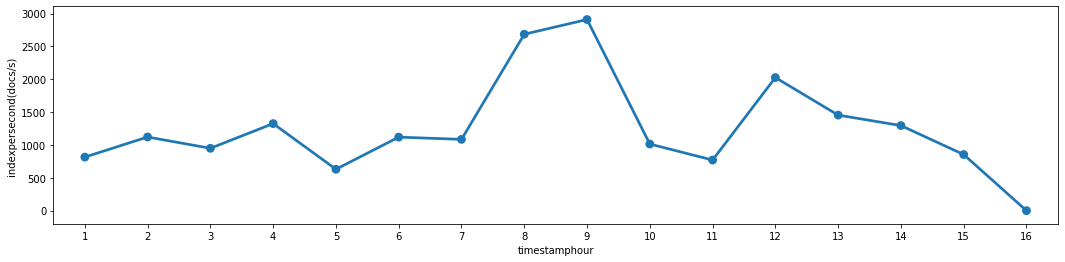

In [7]:
plt.figure(figsize=[18,4])

sns.pointplot(x=pivot.index, y='indexpersecond(docs/s)',data=pivot)

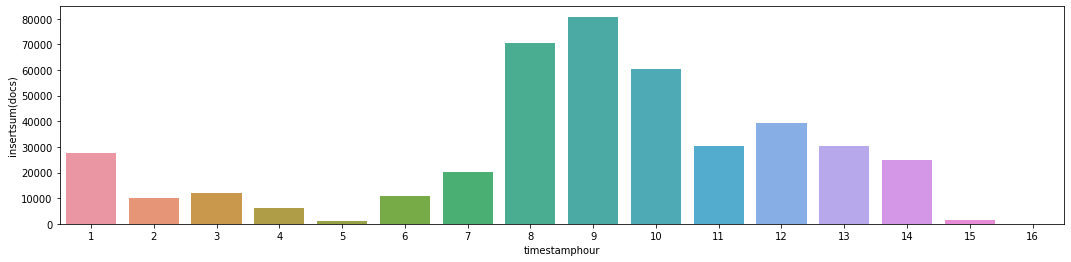

In [8]:
fig, ax4 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=pivot, x=pivot.index, y="insertsum(docs)", ax=ax4)

## write to excel

In [9]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("pandas_header_format.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object. Note that we turn off
# the default header and skip one row to allow us to insert a user defined
# header.
pivot.to_excel(writer, sheet_name='Sheet1', startrow=1, header=False)

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 4)
worksheet.set_column('B:B', 9)
worksheet.set_column('C:C', 10)
worksheet.set_column('D:D', 14)
worksheet.set_column('E:E', 11)
worksheet.set_column('F:F', 11)
worksheet.set_column('G:G', 11)
worksheet.set_column('H:H', 11)
worksheet.set_column('I:I', 11)
worksheet.conditional_format('B2:B25', {'type': 'data_bar',
                                        'bar_color': '#5688BC'})

# Add a header format.
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color': '#E8F5FF',
    'border': 1})

# Write the column headers with the defined format.
for col_num, value in enumerate(pivot.columns.values):
    worksheet.write(0, col_num + 1, value, header_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

---

In [10]:
pivot.insert(2, 'indexsum(docs)', pivot['insertsum(docs)'] + pivot['updatesum(docs)'])

In [11]:
columns = {"insertsum(docs)":"색인 추가(회)", "updatesum(docs)":"색인 수정(회)", "indexsum(docs)":"총색인(회)","indexpersecond(docs/s)":"초당 색인 횟수(회/초)", "processtimesum(s)":"색인 시간(초)", "processtimemean(s)":"평균 색인 시간(초)", "processtimemax(s)":"최고 색인 시간(초)", "processtimemin(s)":"최저 색인 시간(초)", "count(cmds)":"색인 횟수(회)"}
pivot.rename(columns = columns, inplace = True)

In [12]:
idx['timestampdate'] = idx['timestamp'].dt.date

In [13]:
pivot = idx.pivot_table(values=['processtime', 'insert', 'update'], index=['timestampdate', 'timestamphour'] ,aggfunc=np.sum)
pivot['indexpersecond(docs/s)'] = ((pivot['insert'] + pivot['update']) / pivot['processtime']).astype(int)
pivot2 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.mean)
pivot3 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.max)
pivot4 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.min)
pivot5 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc='count')
pivot['processtimemean(s)'] = pivot2['processtime'].round(2)
pivot['processtimemax(s)'] = pivot3['processtime'].round(2)
pivot['processtimemin(s)'] = pivot4['processtime'].round(2)
pivot['count(cmds)'] = pivot5['processtime'].round(2)
new_index = ['insert','update','indexpersecond(docs/s)','processtime','processtimemean(s)','processtimemax(s)','processtimemin(s)','count(cmds)']
new_index_name = {'insert':'insertsum(docs)','update':'updatesum(docs)','processtime':'processtimesum(s)'}
pivot = pivot.reindex(new_index, axis='columns')
pivot.rename(new_index_name,axis='columns',inplace=True)
pivot

insertsum(docs)  updatesum(docs)  \
timestampdate timestamphour                                     
2020-08-03    1                         9201              509   
              2                        10209             2030   
              3                        12019              234   
              4                         6023             3134   
              5                         1038              167   
              6                        10852             2480   
              7                        20394             3400   
              8                        70682            20394   
              9                        80796            49850   
              10                       60292             1487   
              11                       30485             1048   
              12                       39281             3094   
              13                       30482             2847   
              14                       25039             5937   
              15                        1599              229   
              16                           0                0   
2020-08-05    1                         9201              509   
2020-08-06    1                         9201              509   

                             indexpersecond(docs/s)  processtimesum(s)  \
timestampdate timestamphour                                              
2020-08-03    1                                 815              11.91   
              2                                1121              10.91   
              3                                 949              12.91   
              4                                1325               6.91   
              5                                 630               1.91   
              6                                1119              11.91   
              7                                1085              21.91   
              8                                2685              33.91   
              9                                2909              44.91   
              10                               1014              60.91   
              11                                770              40.91   
              12                               2026              20.91   
              13                               1454              22.91   
              14                               1295              23.91   
              15                                854               2.14   
              16                                  0               0.06   
2020-08-05    1                                 815              11.91   
2020-08-06    1                                 815              11.91   

                             processtimemean(s)  processtimemax(s)  \
timestampdate timestamphour                                          
2020-08-03    1                           11.91              11.91   
              2                           10.91              10.91   
              3                           12.91              12.91   
              4                            6.91               6.91   
              5                            1.91               1.91   
              6                           11.91              11.91   
              7                           21.91              21.91   
              8                           33.91              33.91   
              9                           44.91              44.91   
              10                          60.91              60.91   
              11                          40.91              40.91   
              12                          20.91              20.91   
              13                          22.91              22.91   
              14                          23.91              23.91   
              15                           0.71               1.91   
              16                           0.01          

In [14]:
for i in range(24):
    if i < 10:
        idx.replace({'timestamphour':{i:f"0{i}:00 ~ 0{i}:59"}},inplace=True)
    else:
        idx.replace({'timestamphour':{i:f"{i}:00 ~ {i}:59"}},inplace=True)
idx

,timestamp,serviceID,loglevel,message,processtime,insert,update,timestamphour,timestampdate
index,,,,,,,,,
1,2020-08-03 01:37:01,30-Normal:,[1],Done Indexing IndexID=21,11.91,9201,509,01:00 ~ 01:59,2020-08-03
4,2020-08-03 02:37:01,30-Normal:,[1],Done Indexing IndexID=22,10.91,10209,2030,02:00 ~ 02:59,2020-08-03
7,2020-08-03 03:37:01,30-Normal:,[1],Done Indexing IndexID=23,12.91,12019,234,03:00 ~ 03:59,2020-08-03
10,2020-08-03 04:37:01,30-Normal:,[1],Done Indexing IndexID=24,6.91,6023,3134,04:00 ~ 04:59,2020-08-03
13,2020-08-03 05:37:01,30-Normal:,[1],Done Indexing IndexID=25,1.91,1038,167,05:00 ~ 05:59,2020-08-03
16,2020-08-03 06:37:01,30-Normal:,[1],Done Indexing IndexID=26,11.91,10852,2480,06:00 ~ 06:59,2020-08-03
19,2020-08-03 07:37:01,30-Normal:,[1],Done Indexing IndexID=27,21.91,20394,3400,07:00 ~ 07:59,2020-08-03
22,2020-08-03 08:37:01,30-Normal:,[1],Done Indexing IndexID=28,33.91,70682,20394,08:00 ~ 08:59,2020-08-03
25,2020-08-03 09:37:01,30-Normal:,[1],Done Indexing IndexID=29,44.91,80796,49850,09:00 ~ 09:59,2020-08-03


In [15]:
idx['timestampdate'] = idx['timestamp'].dt.date

In [16]:
pivot = idx.pivot_table(values=['processtime', 'insert', 'update'], index=['timestampdate', 'timestamphour'] ,aggfunc=np.sum)
pivot['indexpersecond(docs/s)'] = ((pivot['insert'] + pivot['update']) / pivot['processtime']).astype(int)
pivot2 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.mean)
pivot3 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.max)
pivot4 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc=np.min)
pivot5 = idx.pivot_table(values='processtime', index=['timestampdate', 'timestamphour'], aggfunc='count')
pivot['processtimemean(s)'] = pivot2['processtime'].round(2)
pivot['processtimemax(s)'] = pivot3['processtime'].round(2)
pivot['processtimemin(s)'] = pivot4['processtime'].round(2)
pivot['count(cmds)'] = pivot5['processtime'].round(2)
new_index = ['insert','update','indexpersecond(docs/s)','processtime','processtimemean(s)','processtimemax(s)','processtimemin(s)','count(cmds)']
new_index_name = {'insert':'insertsum(docs)','update':'updatesum(docs)','processtime':'processtimesum(s)'}
pivot = pivot.reindex(new_index, axis='columns')
pivot.rename(new_index_name,axis='columns',inplace=True)
pivot

insertsum(docs)  updatesum(docs)  \
timestampdate timestamphour                                     
2020-08-03    01:00 ~ 01:59             9201              509   
              02:00 ~ 02:59            10209             2030   
              03:00 ~ 03:59            12019              234   
              04:00 ~ 04:59             6023             3134   
              05:00 ~ 05:59             1038              167   
              06:00 ~ 06:59            10852             2480   
              07:00 ~ 07:59            20394             3400   
              08:00 ~ 08:59            70682            20394   
              09:00 ~ 09:59            80796            49850   
              10:00 ~ 10:59            60292             1487   
              11:00 ~ 11:59            30485             1048   
              12:00 ~ 12:59            39281             3094   
              13:00 ~ 13:59            30482             2847   
              14:00 ~ 14:59            25039             5937   
              15:00 ~ 15:59             1599              229   
              16:00 ~ 16:59                0                0   
2020-08-05    01:00 ~ 01:59             9201              509   
2020-08-06    01:00 ~ 01:59             9201              509   

                             indexpersecond(docs/s)  processtimesum(s)  \
timestampdate timestamphour                                              
2020-08-03    01:00 ~ 01:59                     815              11.91   
              02:00 ~ 02:59                    1121              10.91   
              03:00 ~ 03:59                     949              12.91   
              04:00 ~ 04:59                    1325               6.91   
              05:00 ~ 05:59                     630               1.91   
              06:00 ~ 06:59                    1119              11.91   
              07:00 ~ 07:59                    1085              21.91   
              08:00 ~ 08:59                    2685              33.91   
              09:00 ~ 09:59                    2909              44.91   
              10:00 ~ 10:59                    1014              60.91   
              11:00 ~ 11:59                     770              40.91   
              12:00 ~ 12:59                    2026              20.91   
              13:00 ~ 13:59                    1454              22.91   
              14:00 ~ 14:59                    1295              23.91   
              15:00 ~ 15:59                     854               2.14   
              16:00 ~ 16:59                       0               0.06   
2020-08-05    01:00 ~ 01:59                     815              11.91   
2020-08-06    01:00 ~ 01:59                     815              11.91   

                             processtimemean(s)  processtimemax(s)  \
timestampdate timestamphour                                          
2020-08-03    01:00 ~ 01:59               11.91              11.91   
              02:00 ~ 02:59               10.91              10.91   
              03:00 ~ 03:59               12.91              12.91   
              04:00 ~ 04:59                6.91               6.91   
              05:00 ~ 05:59                1.91               1.91   
              06:00 ~ 06:59               11.91              11.91   
              07:00 ~ 07:59               21.91              21.91   
              08:00 ~ 08:59               33.91              33.91   
              09:00 ~ 09:59               44.91              44.91   
              10:00 ~ 10:59               60.91              60.91   
              11:00 ~ 11:59               40.91              40.91   
              12:00 ~ 12:59               20.91              20.91   
              13:00 ~ 13:59               22.91              22.91   
              14:00 ~ 14:59               23.91              23.91   
              15:00 ~ 15:59                0.71               1.91   
              16:00 ~ 16:59                0.01          

In [17]:
len(pivot)

18

In [18]:
process['timestamphour'] = process['timestamp'].dt.hour
pivottable = idx.pivot_table(values='processtime', index='timestamphour' ,aggfunc=np.sum)
pivottable

,processtime
timestamphour,
01:00 ~ 01:59,35.73
02:00 ~ 02:59,10.91
03:00 ~ 03:59,12.91
04:00 ~ 04:59,6.91
05:00 ~ 05:59,1.91
06:00 ~ 06:59,11.91
07:00 ~ 07:59,21.91
08:00 ~ 08:59,33.91
09:00 ~ 09:59,44.91
